In [2]:
import os, tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src import dataio, visualize, evaluate

In [3]:
# データセットの読み込み
df_test, images_test = dataio.read_data('../dataset/test')

100%|██████████| 10000/10000 [00:05<00:00, 1802.93it/s]


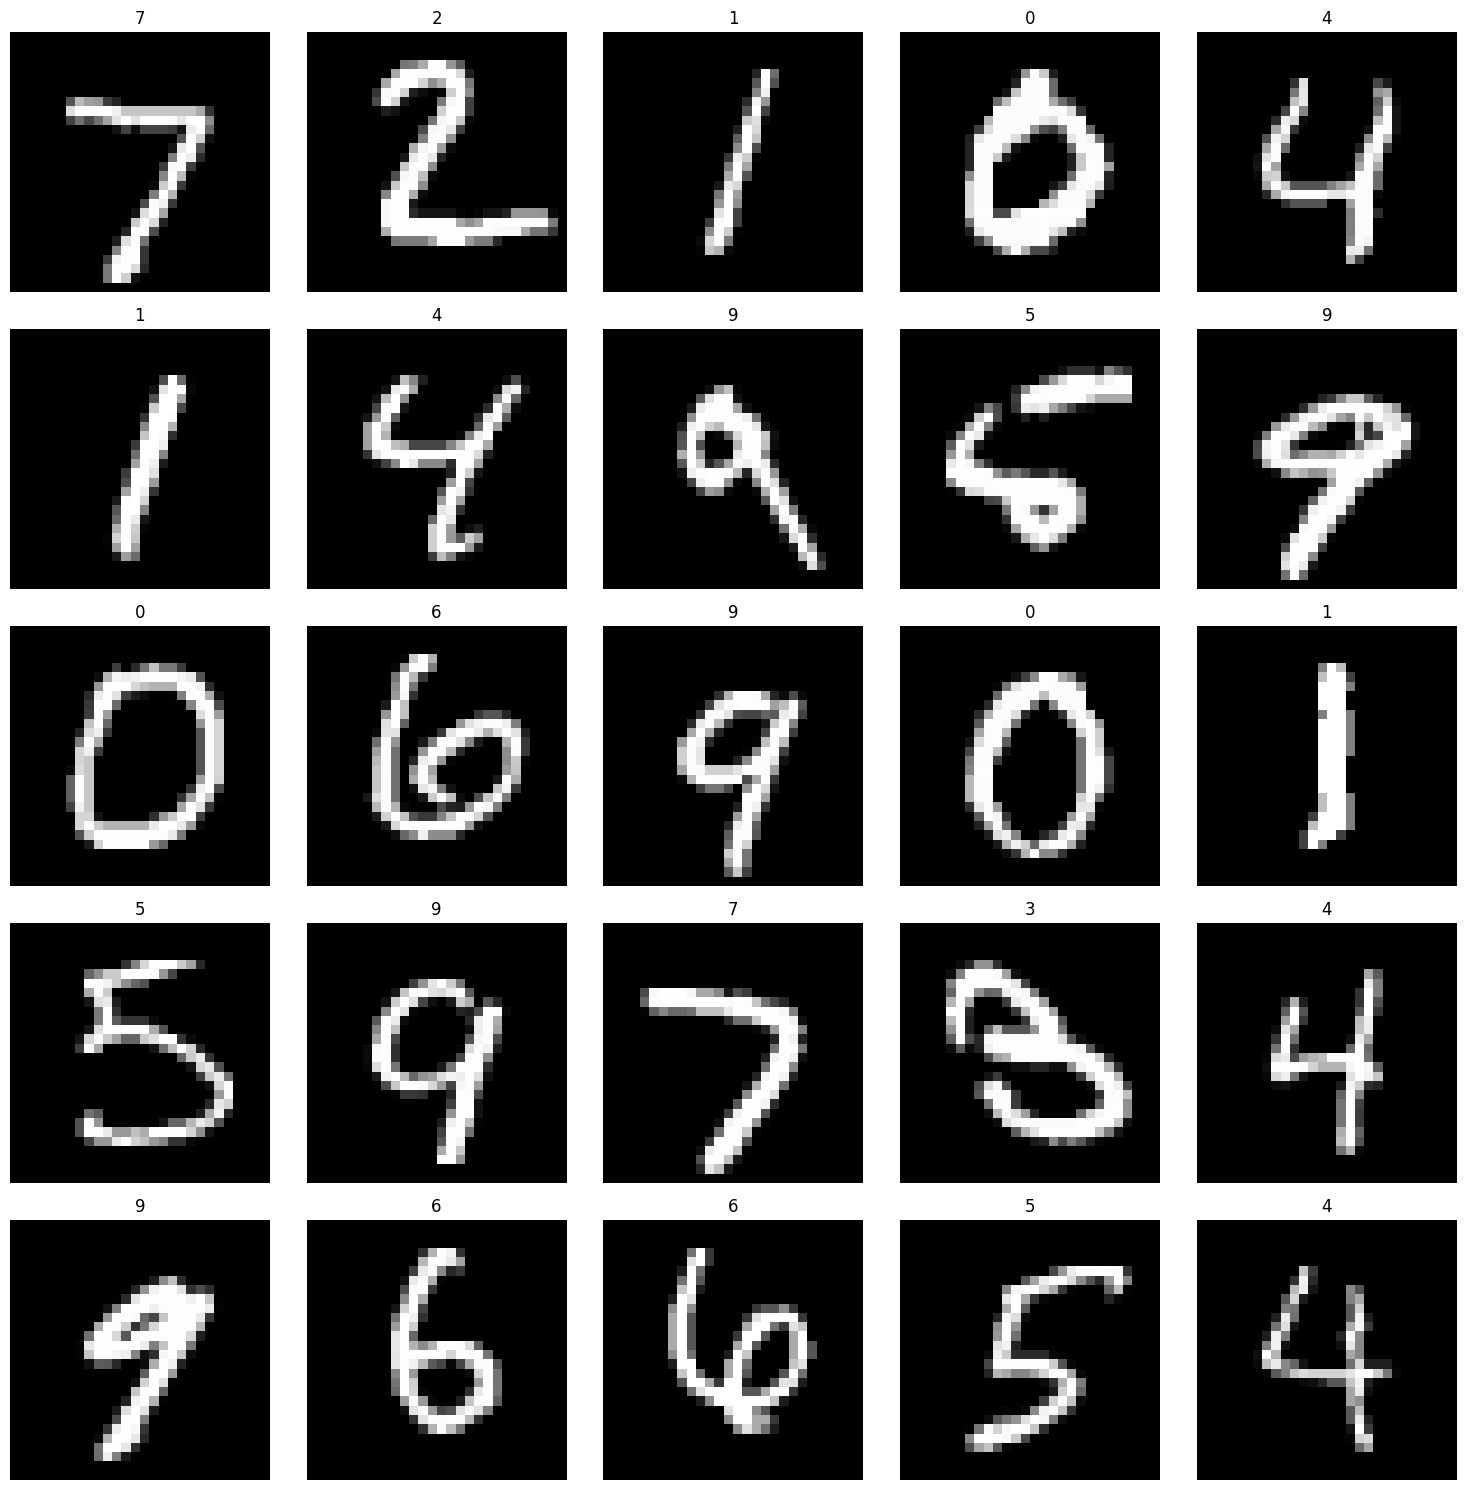

In [4]:
visualize.plot_images(images_test[:25], df_test, ncols=5, figsize=(15, 15))

In [5]:
logistic_data = dataio.read_logistic_weights('../weights/logistic_dict.pkl')

In [6]:
def preprocessing(images: np.ndarray) -> np.ndarray:
    """画像の前処理を行う関数

    Parameters
    ----------
    images : np.ndarray
        前処理する画像

    Returns
    -------
    np.ndarray
        前処理後の画像
    """
    # shape = (n, height=28, width=28)
    images = images.astype(np.float32)
    images /= 255.0 
    return images

def standardize(images: np.ndarray, mean: np.ndarray, std: np.ndarray) -> np.ndarray:
    """画像の標準化を行う関数

    Parameters
    ----------
    images : np.ndarray
        標準化する画像
    mean : np.ndarray
        平均値
    std : np.ndarray
        標準偏差

    Returns
    -------
    np.ndarray
        標準化後の画像
    """
    images = (images - mean) / std
    return images

In [ ]:
def predict(weights_dict: dict[str, np.ndarray], images: np.ndarray) -> np.ndarray:
    """ロジスティック回帰モデルを用いて画像のクラスを予測する関数

    Parameters
    ----------
    weights_dict : dict[str, np.ndarray]
        ロジスティック回帰モデルの重みと切片
    images : np.ndarray
        予測する画像

    Returns
    -------
    np.ndarray
        予測されたクラス
    """
    # shape = (10=ラベル数, 784=特徴量)
    weights = weights_dict['weights']
    # shape = (10=ラベル数,)
    intercept = weights_dict['intercept']
    
    # images: (n, height, width) -> (n, height*width=784)
    # images.reshape(len(images), -1) @ weights.T + intercept: (n, 10)
    # np.argmax: (n,)
    predictions = np.argmax(
        images.reshape(len(images), -1) @ weights.T + intercept,
        axis=1
    )

    return predictions



In [9]:
images_test.shape

(10000, 28, 28)

In [10]:
logistic_data['weights'].shape, logistic_data['intercept'].shape

((10, 784), (10,))

In [11]:
y_true = df_test["label"].values

In [16]:
def run():
    images_test_preprocessed = preprocessing(images_test)
    images_test_preprocessed = standardize(images_test_preprocessed,
                                            mean=logistic_data['mean'], 
                                            std=logistic_data['std'])
    predictions = predict(logistic_data, images_test_preprocessed)
    result = evaluate.calculate_accuracy(y_true, predictions)
    return result

result = evaluate.measure_runtime(run)
print(f"Accuracy: {result:.4f}")

Runtime: 0.034356 seconds
Accuracy: 0.9266


In [13]:
%load_ext snakeviz

In [14]:
%prun -D answer_numpy.prof run()

 
*** Profile stats marshalled to file 'answer_numpy.prof'.


         25 function calls in 0.080 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.064    0.064    0.065    0.065 2583232472.py:1(predict)
        1    0.007    0.007    0.007    0.007 3325427610.py:19(standardize)
        1    0.005    0.005    0.005    0.005 {method 'astype' of 'numpy.ndarray' objects}
        1    0.001    0.001    0.001    0.001 {method 'argmax' of 'numpy.ndarray' objects}
        1    0.001    0.001    0.006    0.006 3325427610.py:1(preprocessing)
        1    0.001    0.001    0.080    0.080 <string>:1(<module>)
        1    0.001    0.001    0.079    0.079 2775766434.py:1(run)
        1    0.000    0.000    0.000    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.000    0.000    0.000    0.000 _methods.py:101(_mean)
        1    0.000    0.000    0.000    0.000 evaluate.py:5(calculate_accuracy)
        1    0.000    0.000    0.000    0.000 _methods.py:67(_count_reduce_